In [2]:
import tensorflow as tf
from tensorflow import keras

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout,Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

from sklearn.model_selection import train_test_split
import time
print(tf.__version__)

2.3.0


# MNIST Fashion Dataset
Train:60,000 <br>
Test:10,000

In [27]:
fashion_mnist = keras.datasets.fashion_mnist

(x_train, y_train ), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train / 255

x_test = x_test / 255

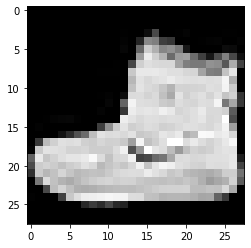

In [28]:
plt.imshow(x_train[0],cmap="gray")

In [29]:
im_rows = 28
im_cols = 28
batch_size = 512
im_shape = (im_rows, im_cols, 1)

x_train = x_train.reshape(x_train.shape[0], *im_shape)
x_test = x_test.reshape(x_test.shape[0], *im_shape)
#x_validate = x_validate.reshape(x_validate.shape[0], *im_shape)

print('x_train shape: {}'.format(x_train.shape))
print('x_test shape: {}'.format(x_test.shape))
#print('x_validate shape: {}'.format(x_validate.shape))

x_train shape: (60000, 28, 28, 1)
x_test shape: (10000, 28, 28, 1)


# MNIST FASHION TUNING

In [30]:
neuron_num=[32,64]
conv_layer=[1,2]
dense_layer=[0,1,2]

In [61]:
for d in dense_layer:
    for n in neuron_num:
        for c in conv_layer:
            name="Project-Tuning-conv-{}-dense--{}neuron-{}-{}".format(c,d,n,int(time.time()))
            model=Sequential()
            model.add(Conv2D(filters=n, kernel_size=(3,3), input_shape=im_shape))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2,2)))
            model.add(Dropout(0.2))
            for nothing in range(c):
                model.add(Conv2D(n,(3,3)))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2,2)))
            model.add(Flatten())
            for nothing in range(d):
                model.add(Dense(n))
            model.add(Dense(10, activation='softmax'))
            tensorboard= TensorBoard(log_dir="logs\{}".format(name))
            model.compile(loss='sparse_categorical_crossentropy',optimizer="Adam",metrics=['accuracy'])
            model.fit(x_train,y_train,epochs=10,batch_size=256,validation_split=0.2,callbacks=[tensorboard])


Epoch 1/10
188/188 [==============================] - 22s 117ms/step - loss: 0.8663 - accuracy: 0.7032 - val_loss: 0.5538 - val_accuracy: 0.7956
Epoch 2/10
188/188 [==============================] - 19s 102ms/step - loss: 0.5046 - accuracy: 0.8159 - val_loss: 0.4719 - val_accuracy: 0.8276
Epoch 3/10
188/188 [==============================] - 19s 102ms/step - loss: 0.4530 - accuracy: 0.8364 - val_loss: 0.4324 - val_accuracy: 0.8481
Epoch 4/10
188/188 [==============================] - 19s 102ms/step - loss: 0.4193 - accuracy: 0.8486 - val_loss: 0.4016 - val_accuracy: 0.8610
Epoch 5/10
188/188 [==============================] - 19s 102ms/step - loss: 0.3970 - accuracy: 0.8577 - val_loss: 0.3901 - val_accuracy: 0.8598
Epoch 6/10
188/188 [==============================] - 19s 102ms/step - loss: 0.3758 - accuracy: 0.8644 - val_loss: 0.3732 - val_accuracy: 0.8707
Epoch 7/10
188/188 [==============================] - 19s 103ms/step - loss: 0.3627 - accuracy: 0.8696 - val_loss: 0.3550 - val_ac

In [1]:
%load_ext tensorboard
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 11408), started 2 days, 10:26:15 ago. (Use '!kill 11408' to kill it.)

<font size="5px">Best EPOCH LOSS 1.conv1,dense2,neuron 64  2.conv1,dense 0,neuron 64  3.conv1,dense 2,neuron 32<br>
Best Epoch Accuracy 1.conv1,dense2,neuron 64   2.conv1,dense0,neuron 64  3.conv1,dense0,neuron 32</font>

# Tuning part 2

In [12]:
neuron_num=[32,64,128]
conv_layer=[1]
dense_layer=[0,2,3,4]

In [13]:
for d in dense_layer:
    for n in neuron_num:
        for c in conv_layer:
            name="Project-2-Tuning-2conv-{}-dense--{}neuron-{}-{}".format(c,d,n,int(time.time()))
            model=Sequential()
            model.add(Conv2D(filters=n, kernel_size=(3,3), input_shape=im_shape))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2,2)))
            model.add(Dropout(0.2))
            for nothing in range(c):
                model.add(Conv2D(n,(3,3)))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2,2)))
            model.add(Flatten())
            for nothing in range(d):
                model.add(Dense(n))
            model.add(Dense(10, activation='softmax'))
            tensorboard= TensorBoard(log_dir="logs\{}".format(name))
            model.compile(loss='sparse_categorical_crossentropy',optimizer="Adam",metrics=['accuracy'])
            model.fit(x_train,y_train,epochs=10,batch_size=256,validation_split=0.2,callbacks=[tensorboard])


Epoch 1/10
150/150 [==============================] - 15s 103ms/step - loss: 0.9331 - accuracy: 0.6717 - val_loss: 0.5922 - val_accuracy: 0.7784
Epoch 2/10
150/150 [==============================] - 14s 93ms/step - loss: 0.5422 - accuracy: 0.7998 - val_loss: 0.4952 - val_accuracy: 0.8195
Epoch 3/10
150/150 [==============================] - 14s 95ms/step - loss: 0.4779 - accuracy: 0.8251 - val_loss: 0.4588 - val_accuracy: 0.8368
Epoch 4/10
150/150 [==============================] - 15s 99ms/step - loss: 0.4491 - accuracy: 0.8376 - val_loss: 0.4290 - val_accuracy: 0.8479
Epoch 5/10
150/150 [==============================] - 15s 98ms/step - loss: 0.4231 - accuracy: 0.8488 - val_loss: 0.4129 - val_accuracy: 0.8524
Epoch 6/10
150/150 [==============================] - 14s 94ms/step - loss: 0.4058 - accuracy: 0.8543 - val_loss: 0.4021 - val_accuracy: 0.8580
Epoch 7/10
150/150 [==============================] - 14s 96ms/step - loss: 0.3914 - accuracy: 0.8598 - val_loss: 0.3943 - val_accuracy

150/150 [==============================] - 34s 224ms/step - loss: 0.6921 - accuracy: 0.7442 - val_loss: 0.4538 - val_accuracy: 0.8376
Epoch 2/10
150/150 [==============================] - 30s 199ms/step - loss: 0.4238 - accuracy: 0.8429 - val_loss: 0.3786 - val_accuracy: 0.8645
Epoch 3/10
150/150 [==============================] - 31s 210ms/step - loss: 0.3617 - accuracy: 0.8688 - val_loss: 0.3555 - val_accuracy: 0.8730
Epoch 4/10
150/150 [==============================] - 32s 211ms/step - loss: 0.3271 - accuracy: 0.8797 - val_loss: 0.3308 - val_accuracy: 0.8821
Epoch 5/10
150/150 [==============================] - 34s 229ms/step - loss: 0.3036 - accuracy: 0.8884 - val_loss: 0.3286 - val_accuracy: 0.8817
Epoch 6/10
150/150 [==============================] - 31s 209ms/step - loss: 0.2871 - accuracy: 0.8943 - val_loss: 0.2990 - val_accuracy: 0.8929
Epoch 7/10
150/150 [==============================] - 30s 198ms/step - loss: 0.2748 - accuracy: 0.9001 - val_loss: 0.2937 - val_accuracy: 0.8

In [2]:
%load_ext tensorboard
%tensorboard --logdir logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 11408), started 2 days, 10:26:36 ago. (Use '!kill 11408' to kill it.)

<font size="5px">Order Conv,Dense,Neurons<br>
BEST Accuracy Train 1,3,128,  1,4,128,  1,2,128<br>
BEST Accuracy Validation 1,3,128,  1,2,128  1,4,128<br>
<br>
BEST LOST TRAIN 1,3,128,  1,2,128,  1,4,128<br>
BEST LOST Validation 1,3,128,  1,2,128,  1,4,64<br>
</font>

# Aimel's Accuracy rate
Source: https://github.com/aieml/face-mask-detection-keras
<img src="harr_accuracy.png"><br>


# FACE MASK DATASET

In [3]:
data_path='dataset'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels))

print(label_dict)
print(categories)
print(labels)

img_size=100
data=[]
label=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
            resized=cv2.resize(gray,(img_size,img_size))
            data.append(resized)
            label.append(label_dict[category])

        except Exception as e:
            pass
            
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
label=np.array(label)


{'with mask': 0, 'without mask': 1}
['with mask', 'without mask']
[0, 1]


In [9]:
im_rows = 100
im_cols = 100
batch_size = 512
im_shape = (im_rows, im_cols, 1)

data = data.reshape(data.shape[0], *im_shape)
#x_validate = x_validate.reshape(x_validate.shape[0], *im_shape)

print('data shape: {}'.format(data.shape))

data shape: (1376, 100, 100, 1)


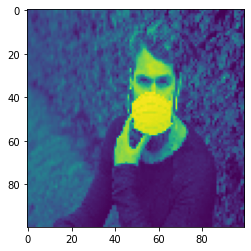

In [19]:
plt.imshow(data[0])

In [24]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.1)

In [108]:
neuron_num=[50,100]
conv_layer=[1,2]
dense_layer=[10,15]

In [110]:
for d in dense_layer:
    for n in neuron_num:
        for c in conv_layer:
            model=Sequential()
            name="Project-FaceMask-Real -1-Tuning-2conv-{}-dense--{}neuron-{}-{}".format(c,d,n,int(time.time()))
            model.add(Conv2D(n,(3,3),input_shape=data.shape[1:]))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2,2)))
            for nothing in range(c):
                model.add(Conv2D(n,(3,3)))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2,2)))

            model.add(Flatten())
            model.add(Dropout(0.5))
            for nothing in range(d):
                model.add(Dense(d,activation='relu'))
            model.add(Dense(2,activation='softmax'))
            tensorboard= TensorBoard(log_dir="logs\{}".format(name))
            model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
            model.fit(train_data,train_target,epochs=10,validation_split=0.2,callbacks=[tensorboard])

Epoch 1/10
31/31 [==============================] - 5s 175ms/step - loss: 0.6932 - accuracy: 0.4899 - val_loss: 0.6932 - val_accuracy: 0.4597
Epoch 2/10
31/31 [==============================] - 5s 152ms/step - loss: 0.6931 - accuracy: 0.5121 - val_loss: 0.6938 - val_accuracy: 0.4597
Epoch 3/10
31/31 [==============================] - 5s 149ms/step - loss: 0.6930 - accuracy: 0.5121 - val_loss: 0.6942 - val_accuracy: 0.4597
Epoch 4/10
31/31 [==============================] - 5s 152ms/step - loss: 0.6930 - accuracy: 0.5121 - val_loss: 0.6944 - val_accuracy: 0.4597
Epoch 5/10
31/31 [==============================] - 5s 154ms/step - loss: 0.6930 - accuracy: 0.5121 - val_loss: 0.6945 - val_accuracy: 0.4597
Epoch 6/10
31/31 [==============================] - 5s 163ms/step - loss: 0.6929 - accuracy: 0.5121 - val_loss: 0.6945 - val_accuracy: 0.4597
Epoch 7/10
31/31 [==============================] - 5s 174ms/step - loss: 0.6929 - accuracy: 0.5121 - val_loss: 0.6949 - val_accuracy: 0.4597
Epoch 

In [9]:
%load_ext tensorboard
%tensorboard --logdir logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 11408), started 4 days, 21:52:33 ago. (Use '!kill 11408' to kill it.)

In [112]:
neuron_num=[50,100]
conv_layer=[3]
dense_layer=[20]

In [114]:
for d in dense_layer:
    for n in neuron_num:
        for c in conv_layer:
            model=Sequential()
            name="Project-FaceMask-Real-2-Tuning-2conv-{}-dense--{}neuron-{}-{}".format(c,d,n,int(time.time()))
            model.add(Conv2D(n,(3,3),input_shape=data.shape[1:]))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2,2)))
            for nothing in range(c):
                model.add(Conv2D(n,(3,3)))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2,2)))

            model.add(Flatten())
            model.add(Dropout(0.5))
            for nothing in range(d):
                model.add(Dense(d,activation='relu'))
            model.add(Dense(2,activation='softmax'))
            tensorboard= TensorBoard(log_dir="logs\{}".format(name))
            model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
            model.fit(train_data,train_target,epochs=10,validation_split=0.2,callbacks=[tensorboard])

Epoch 1/10
31/31 [==============================] - 13s 405ms/step - loss: 0.6935 - accuracy: 0.4879 - val_loss: 0.6930 - val_accuracy: 0.5403
Epoch 2/10
31/31 [==============================] - 11s 356ms/step - loss: 0.6931 - accuracy: 0.5040 - val_loss: 0.6937 - val_accuracy: 0.4597
Epoch 3/10
31/31 [==============================] - 10s 320ms/step - loss: 0.6930 - accuracy: 0.5121 - val_loss: 0.6940 - val_accuracy: 0.4597
Epoch 4/10
31/31 [==============================] - 11s 343ms/step - loss: 0.6930 - accuracy: 0.5121 - val_loss: 0.6943 - val_accuracy: 0.4597
Epoch 5/10
31/31 [==============================] - 10s 330ms/step - loss: 0.6930 - accuracy: 0.5121 - val_loss: 0.6948 - val_accuracy: 0.4597
Epoch 6/10
31/31 [==============================] - 10s 336ms/step - loss: 0.6929 - accuracy: 0.5121 - val_loss: 0.6949 - val_accuracy: 0.4597
Epoch 7/10
31/31 [==============================] - 11s 344ms/step - loss: 0.6929 - accuracy: 0.5121 - val_loss: 0.6947 - val_accuracy: 0.4597

In [4]:
%load_ext tensorboard
%tensorboard --logdir logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 11408), started 2 days, 10:27:13 ago. (Use '!kill 11408' to kill it.)

In [17]:
neuron_num=[500]
conv_layer=[3]
dense_layer=[50]

In [128]:
for d in dense_layer:
    for n in neuron_num:
        for c in conv_layer:
            model=Sequential()
            name="Project-FaceMask-Real-BIG-Tuning-2conv-{}-dense--{}neuron-{}-{}".format(c,d,n,int(time.time()))
            model.add(Conv2D(n,(3,3),input_shape=data.shape[1:]))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2,2)))
            for nothing in range(c):
                model.add(Conv2D(n,(3,3)))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2,2)))

            model.add(Flatten())
            model.add(Dropout(0.5))
            for nothing in range(d):
                model.add(Dense(d,activation='relu'))
            model.add(Dense(2,activation='softmax'))
            tensorboard= TensorBoard(log_dir="logs\{}".format(name))
            model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
            model.fit(train_data,train_target,epochs=10,validation_split=0.2,callbacks=[tensorboard])

Epoch 1/10
31/31 [==============================] - 244s 8s/step - loss: 0.6933 - accuracy: 0.4919 - val_loss: 0.6941 - val_accuracy: 0.4597
Epoch 2/10
31/31 [==============================] - 242s 8s/step - loss: 0.6932 - accuracy: 0.5121 - val_loss: 0.6946 - val_accuracy: 0.4597
Epoch 3/10
31/31 [==============================] - 239s 8s/step - loss: 0.6932 - accuracy: 0.5101 - val_loss: 0.6929 - val_accuracy: 0.5403
Epoch 4/10
31/31 [==============================] - 242s 8s/step - loss: 0.6935 - accuracy: 0.4899 - val_loss: 0.6944 - val_accuracy: 0.4597
Epoch 5/10
31/31 [==============================] - 241s 8s/step - loss: 0.6934 - accuracy: 0.5121 - val_loss: 0.6941 - val_accuracy: 0.4597
Epoch 6/10
31/31 [==============================] - 252s 8s/step - loss: 0.6932 - accuracy: 0.5121 - val_loss: 0.6952 - val_accuracy: 0.4597
Epoch 7/10
31/31 [==============================] - 243s 8s/step - loss: 0.6932 - accuracy: 0.5121 - val_loss: 0.6957 - val_accuracy: 0.4597
Epoch 8/10
31

In [5]:
%load_ext tensorboard
%tensorboard --logdir logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 11408), started 2 days, 10:27:35 ago. (Use '!kill 11408' to kill it.)

In [17]:
from tensorflow.keras.models import load_model
model = load_model('model-017.model')
face_clsfr=cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

source=cv2.VideoCapture(0)
labels_dict={1:'NO MASK'}
color_dict={1:(255,255,255)}

In [18]:
while(True):

    ret,img=source.read()
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_clsfr.detectMultiScale(gray,1.3,5)  

    for x,y,w,h in faces:
    
        face_img=gray[y:y+w,x:x+w]
        resized=cv2.resize(face_img,(100,100))
        normalized=resized/255.0
        reshaped=np.reshape(normalized,(1,100,100,1))
        result=model.predict(reshaped)

        label=np.argmax(result,axis=1)[0]
      
        cv2.rectangle(img,(x,y),(x+w,y+h),color_dict[label],2)
        cv2.rectangle(img,(x,y-40),(x+w,y),color_dict[label],-1)
        cv2.putText(img, labels_dict[label], (x, y-10),cv2.FONT_HERSHEY_SIMPLEX,0.8,(0,0,0),2)
        
        
    cv2.imshow('LIVE',img)
    key=cv2.waitKey(1)
    
    if(key==27):
        break
        
cv2.destroyAllWindows()
source.release()

In [169]:
labels_dict[1]

'NO MASK'

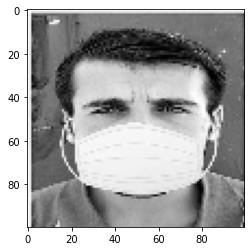

In [4]:
plt.imshow(data[4],cmap="gray")